# 04 — Visualizations

All analysis charts:
1. **Scatter + Regression**: Performance vs. Salary per position
2. **Bar Charts**: Top bargains and overpaid per position
3. **Box Plots**: Salary distribution by position
4. **Year-over-Year Trends**: Value efficiency over time
5. **Team Heatmap**: Best-value franchises by position
6. **Rookie vs. Veteran**: Contract value distributions
7. **Player Trajectories**: Individual deep dives

In [1]:
import sys
sys.path.insert(0, '..')

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from src.data_loader import DATA_DIR
from src.viz import (
    scatter_performance_vs_salary,
    bar_chart_top_values,
    boxplot_salary_by_position,
    year_over_year_trends,
    team_value_heatmap,
    rookie_vs_veteran_comparison,
    player_trajectory,
    all_positions_scatter_grid,
)

import plotly.io as pio
pio.renderers.default = 'notebook'

pd.set_option('display.max_columns', 50)

E:\Python\Python38-32\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\Python\Python38-32\lib\site-packages\numpy\.libs\libopenblas.D6ALFJ4QQDWP6YNOQJNPYL27LRE6SILT.gfortran-win32.dll
E:\Python\Python38-32\lib\site-packages\numpy\.libs\libopenblas_v0.3.21-gcc_8_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
scored = pd.read_parquet(DATA_DIR / 'scored.parquet', engine='fastparquet')
print(f"Loaded: {scored.shape[0]:,} player-seasons")
print(f"Positions: {sorted(scored['pos_group'].unique())}")
print(f"Seasons: {sorted(scored['season'].unique())}")

Loaded: 9,041 player-seasons
Positions: ['DB', 'DL', 'K', 'LB', 'OL', 'QB', 'RB', 'TE', 'WR']
Seasons: [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


---
## 5a. Scatter: Performance vs. Salary

Interactive scatter plots per position group. Hover for details, outliers labeled.

In [3]:
# QB scatter (interactive)
fig = scatter_performance_vs_salary(scored, 'QB', highlight_threshold=1.5)
if fig: fig.show()

In [4]:
# WR scatter
fig = scatter_performance_vs_salary(scored, 'WR', highlight_threshold=1.5)
if fig: fig.show()

In [5]:
# RB scatter
fig = scatter_performance_vs_salary(scored, 'RB', highlight_threshold=1.5)
if fig: fig.show()

In [6]:
# DL scatter
fig = scatter_performance_vs_salary(scored, 'DL', highlight_threshold=1.5)
if fig: fig.show()

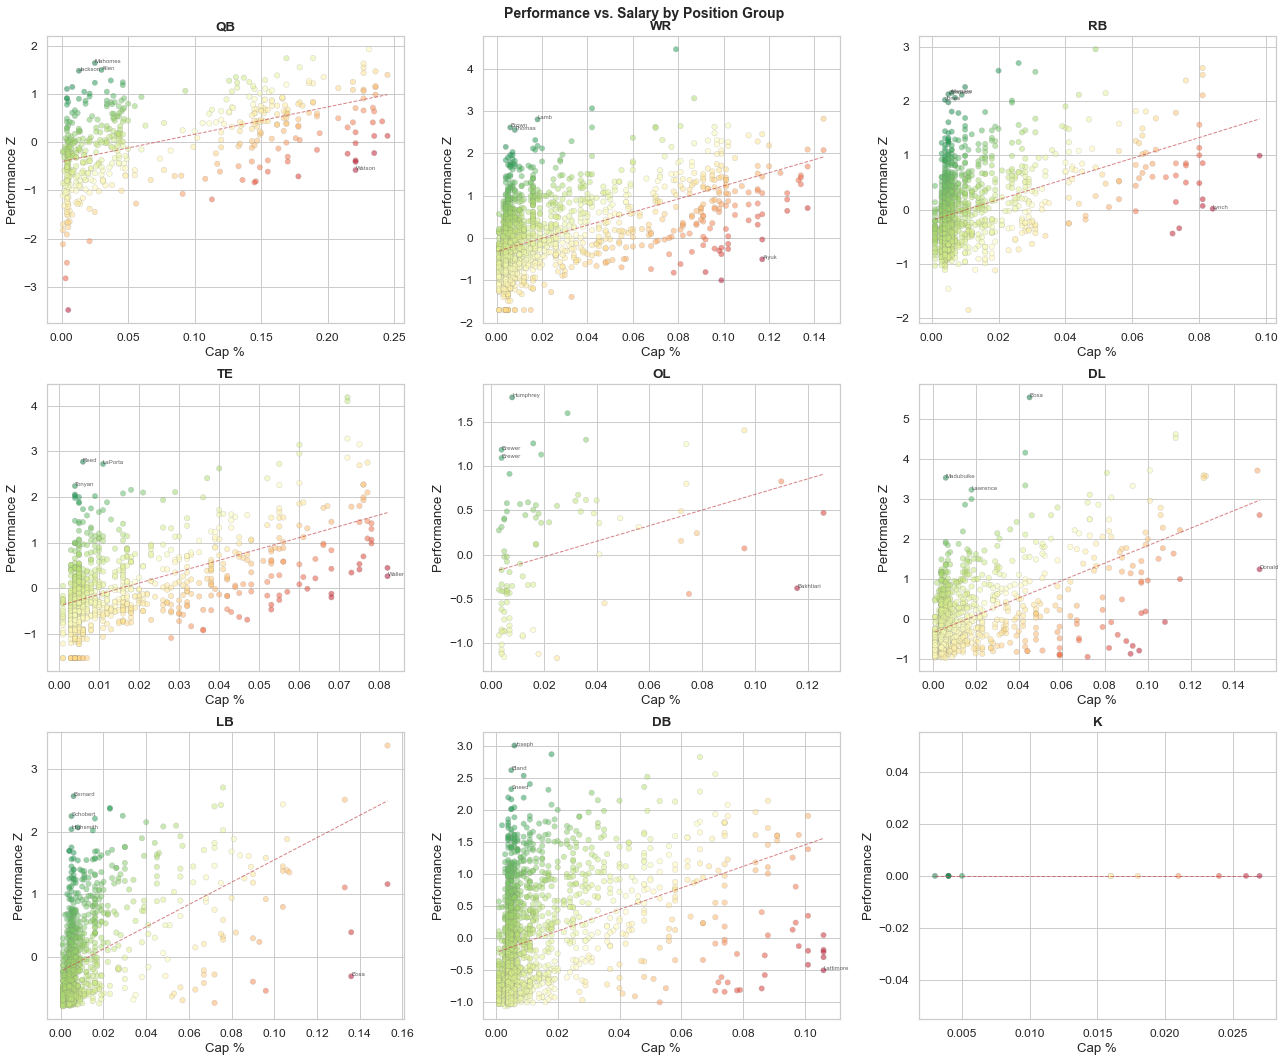

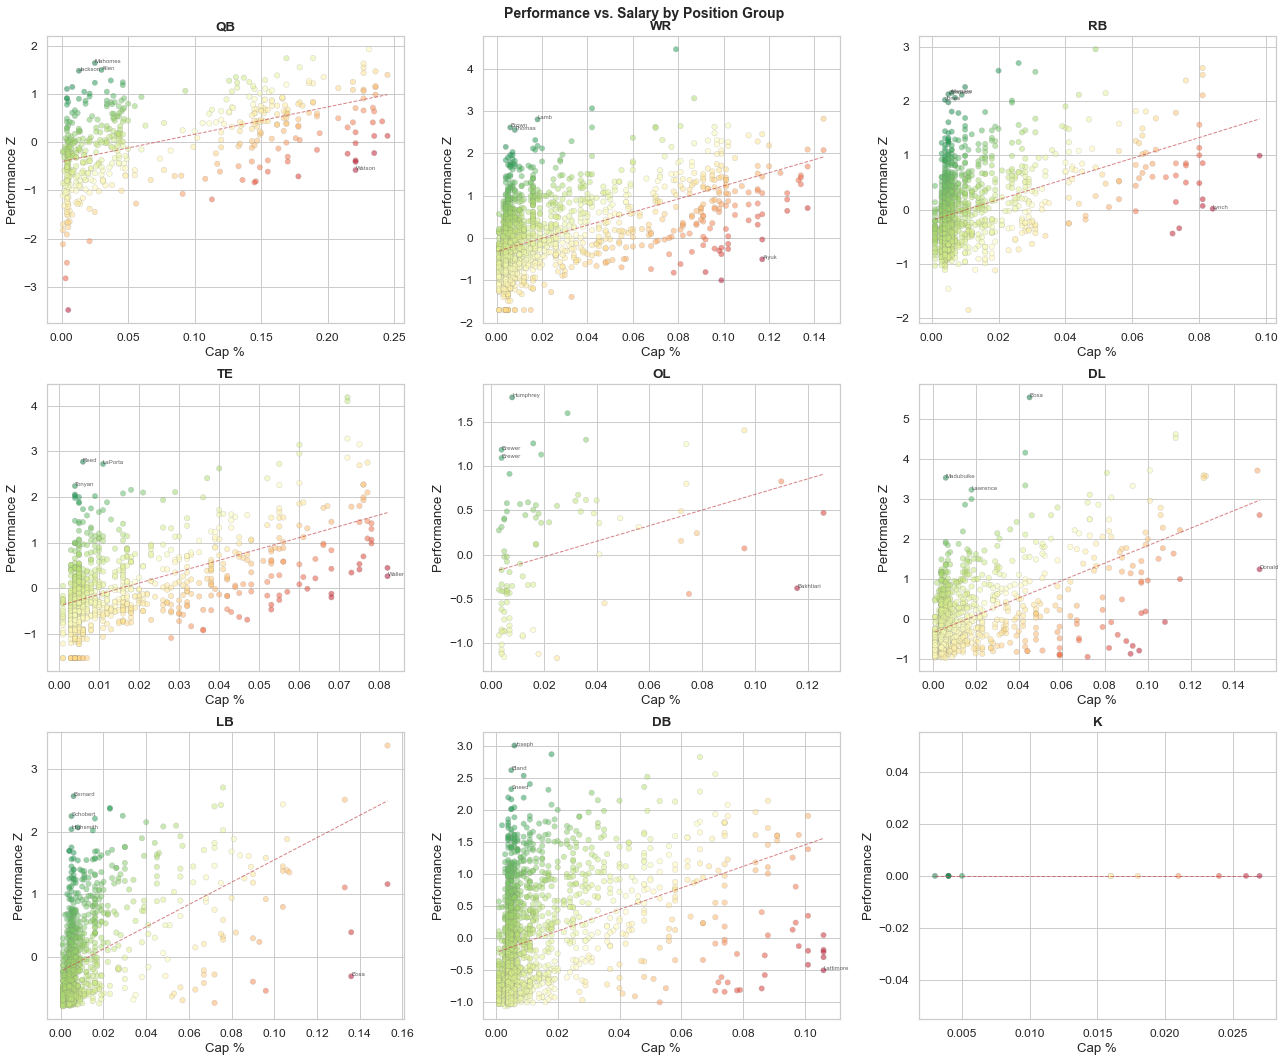

In [7]:
# All positions grid (static)
fig = all_positions_scatter_grid(scored, highlight_threshold=1.5)
fig

---
## 5b. Top/Bottom Value Rankings

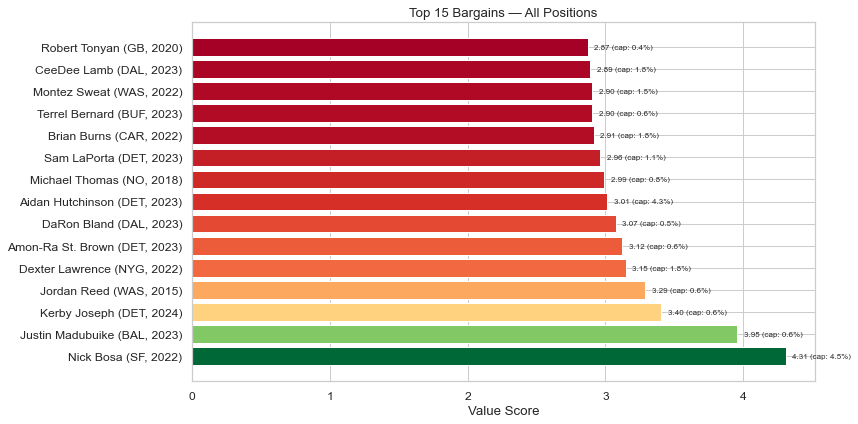

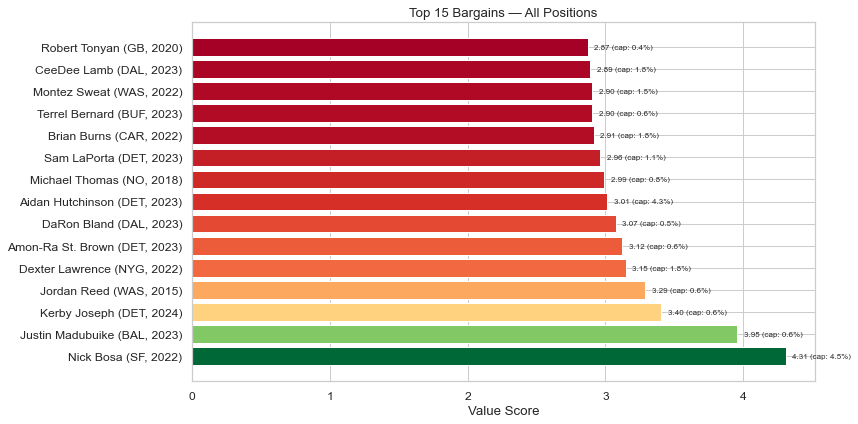

In [8]:
# Top 15 Bargains — All positions
fig = bar_chart_top_values(scored, n=15, chart_type='bargains')
fig

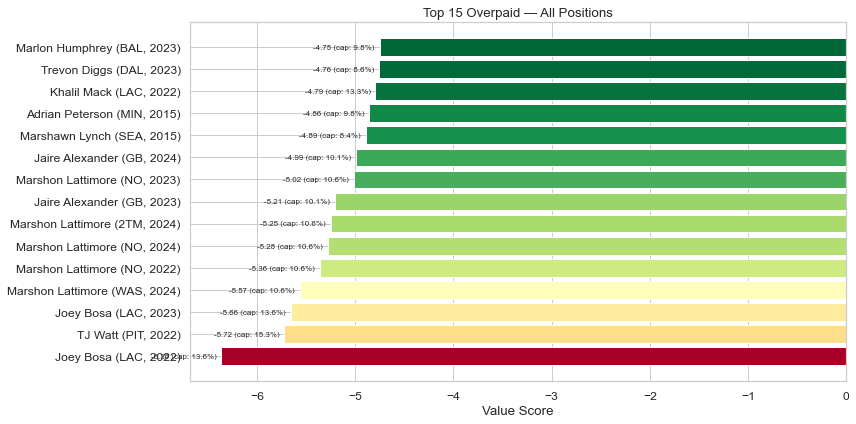

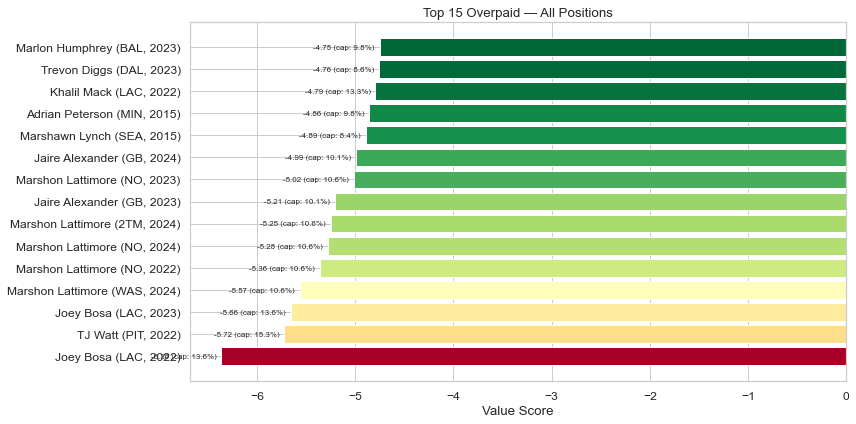

In [9]:
# Top 15 Overpaid — All positions
fig = bar_chart_top_values(scored, n=15, chart_type='overpaid')
fig

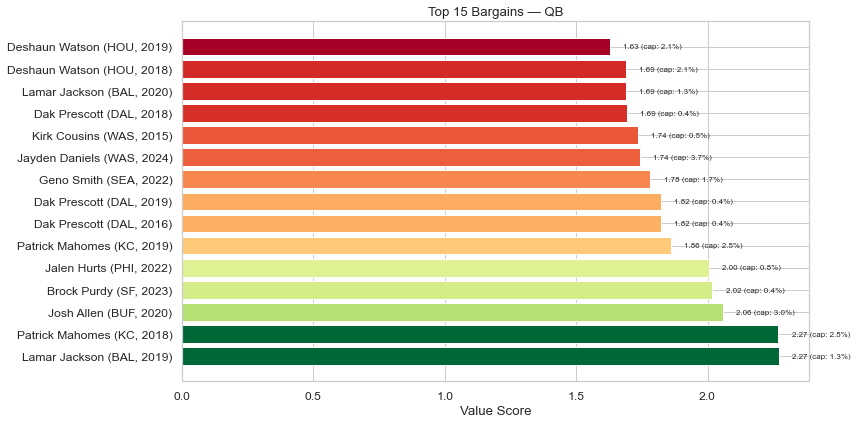

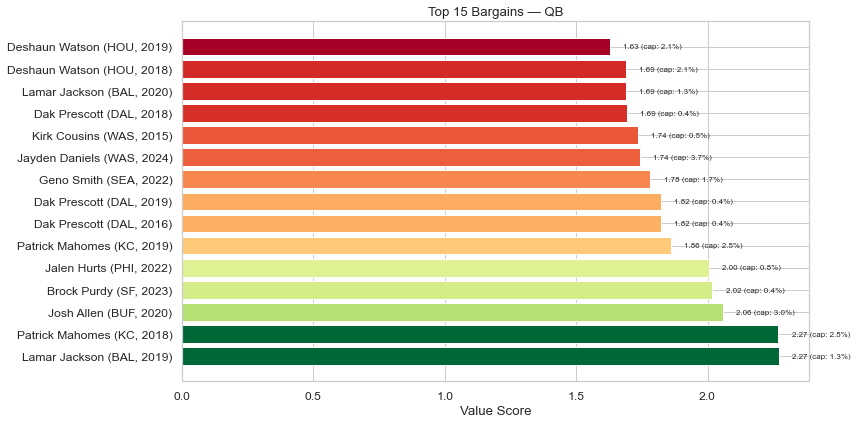

In [10]:
# QB Bargains
fig = bar_chart_top_values(scored, pos_group='QB', n=15, chart_type='bargains')
fig

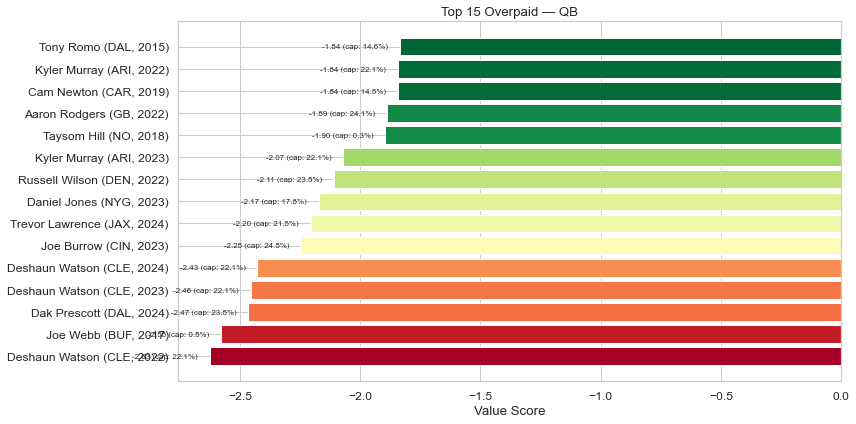

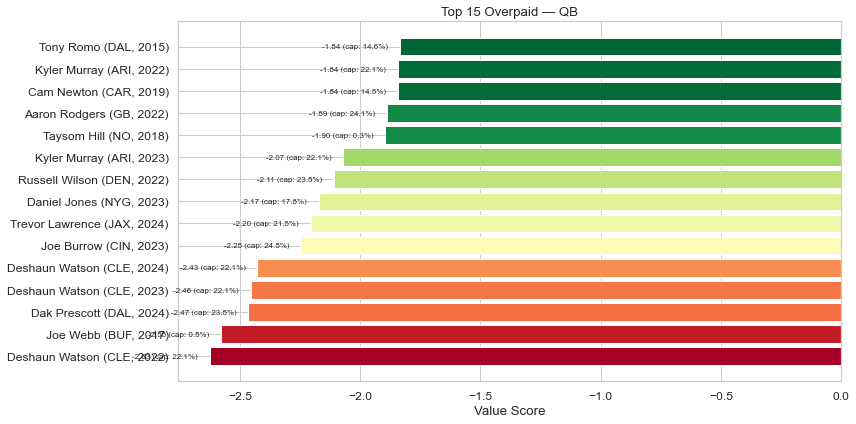

In [11]:
# QB Overpaid
fig = bar_chart_top_values(scored, pos_group='QB', n=15, chart_type='overpaid')
fig

---
## 5c. Salary Distribution by Position

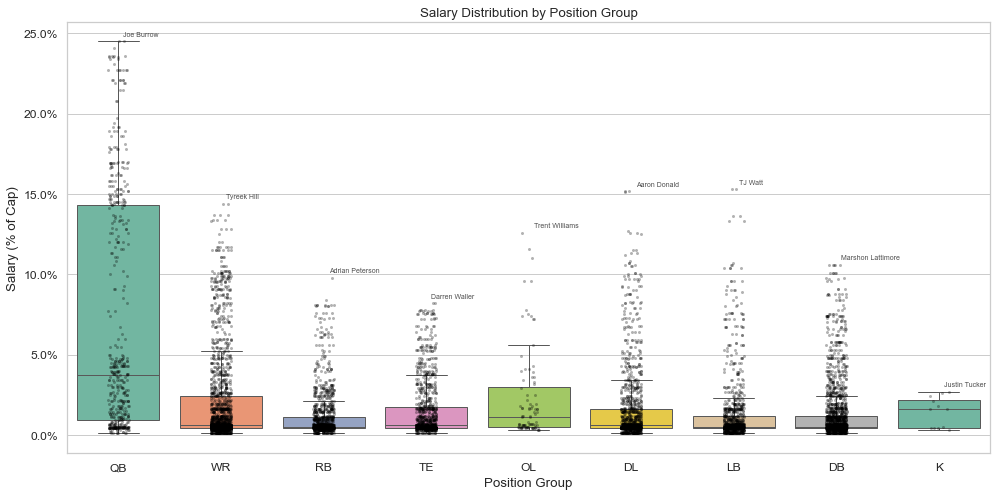

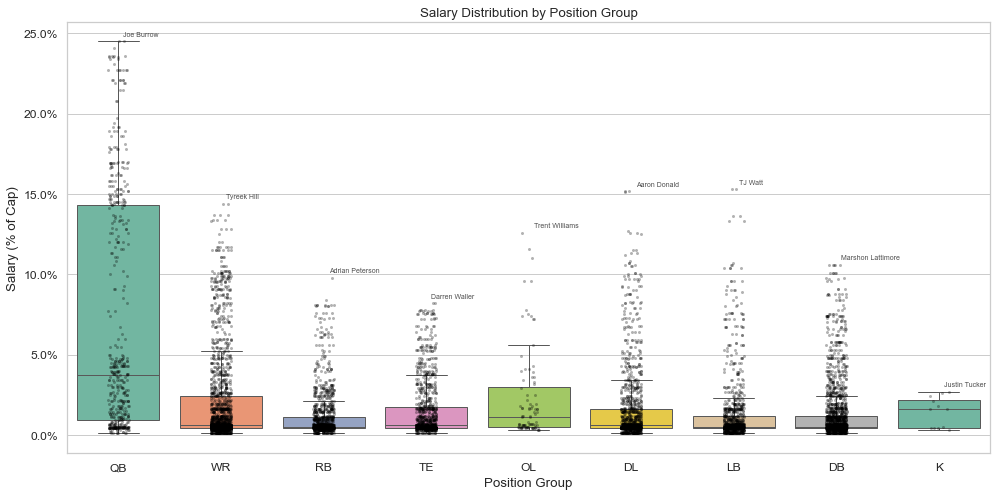

In [12]:
fig = boxplot_salary_by_position(scored)
fig

---
## 5d. Year-over-Year Trends

In [13]:
fig = year_over_year_trends(scored)
fig.show()

---
## 5e. Team Value Heatmap

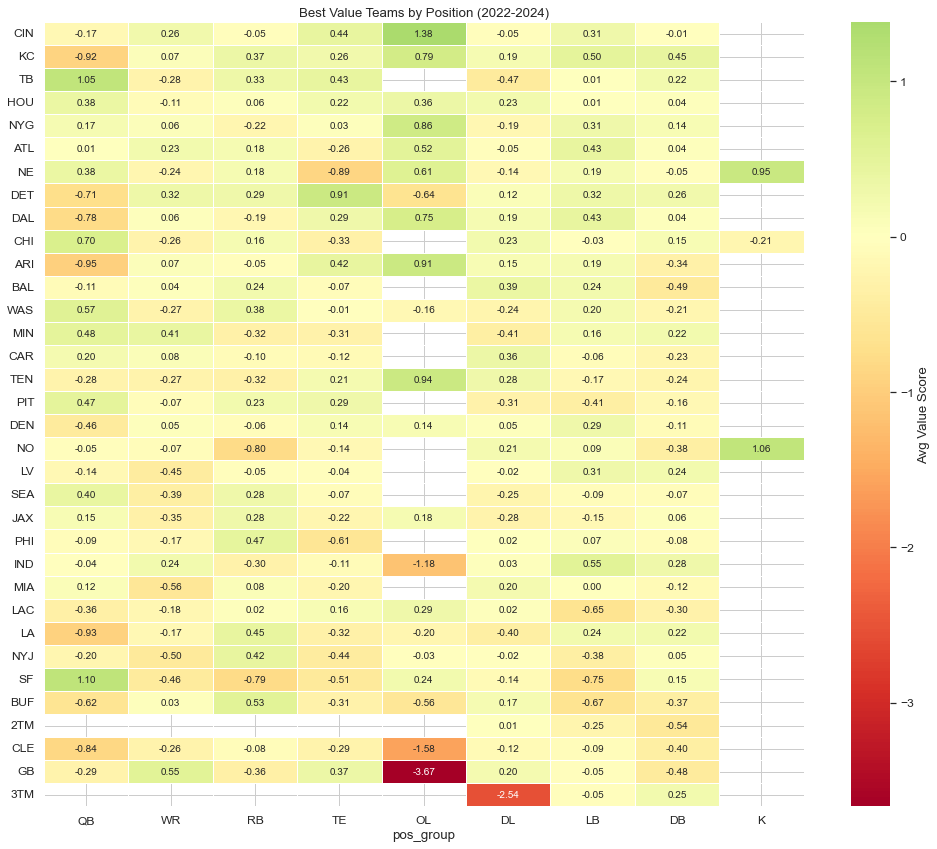

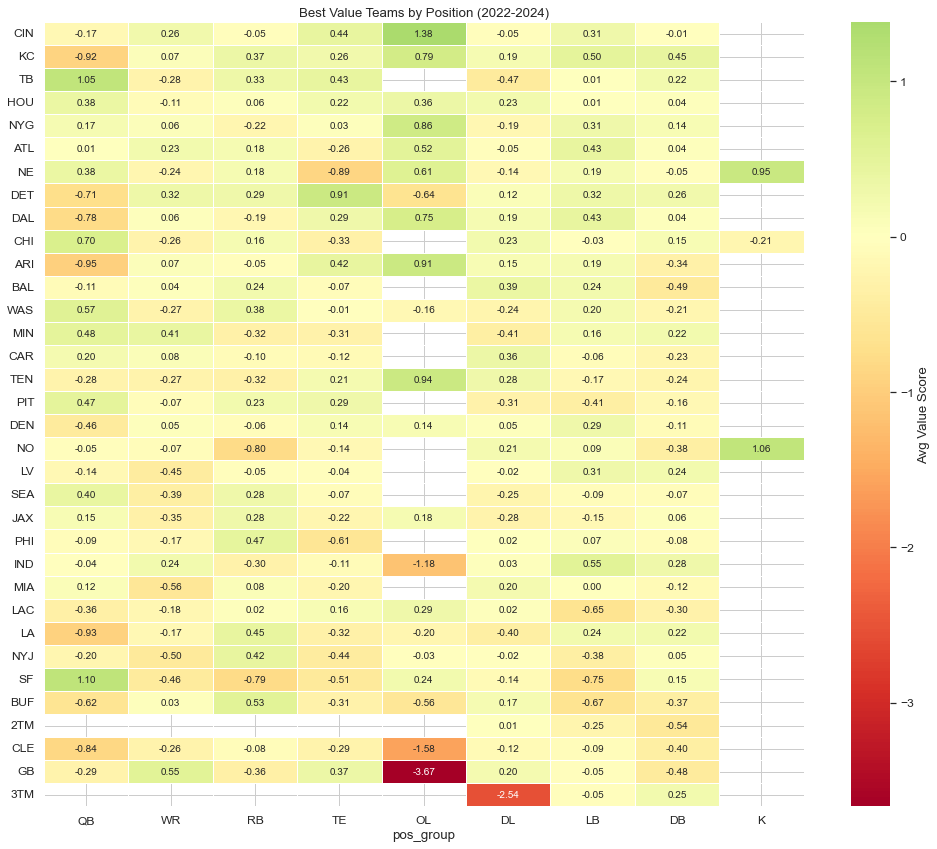

In [14]:
# Last 3 seasons
fig = team_value_heatmap(scored, seasons=[2022, 2023, 2024])
fig

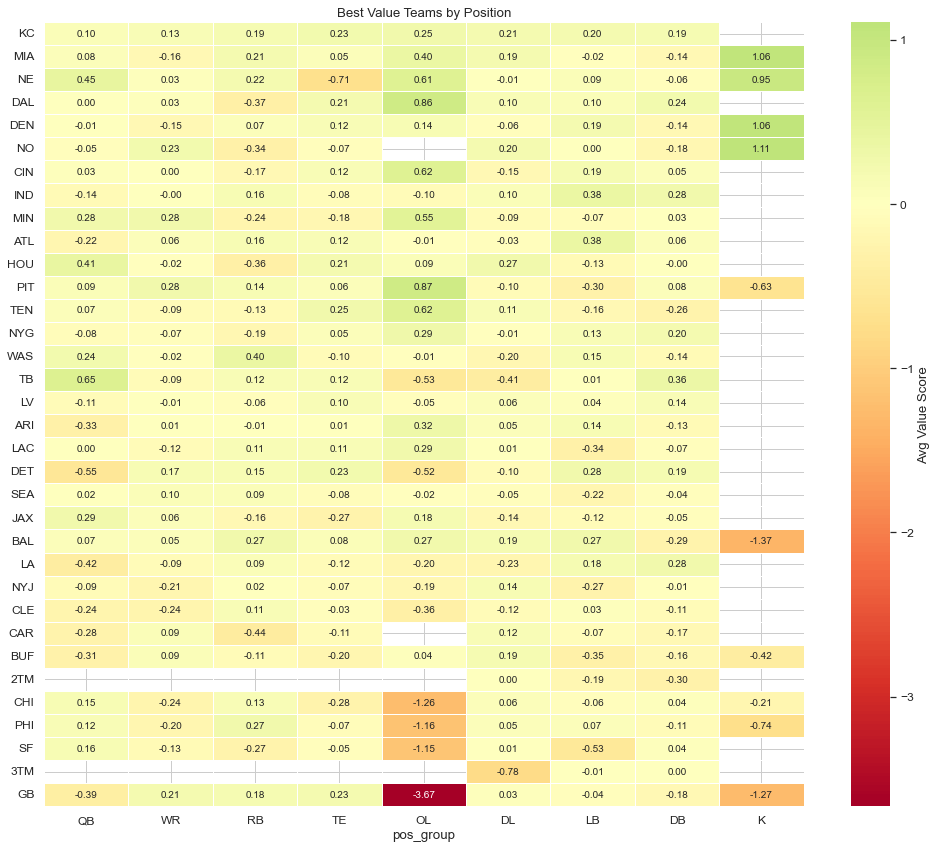

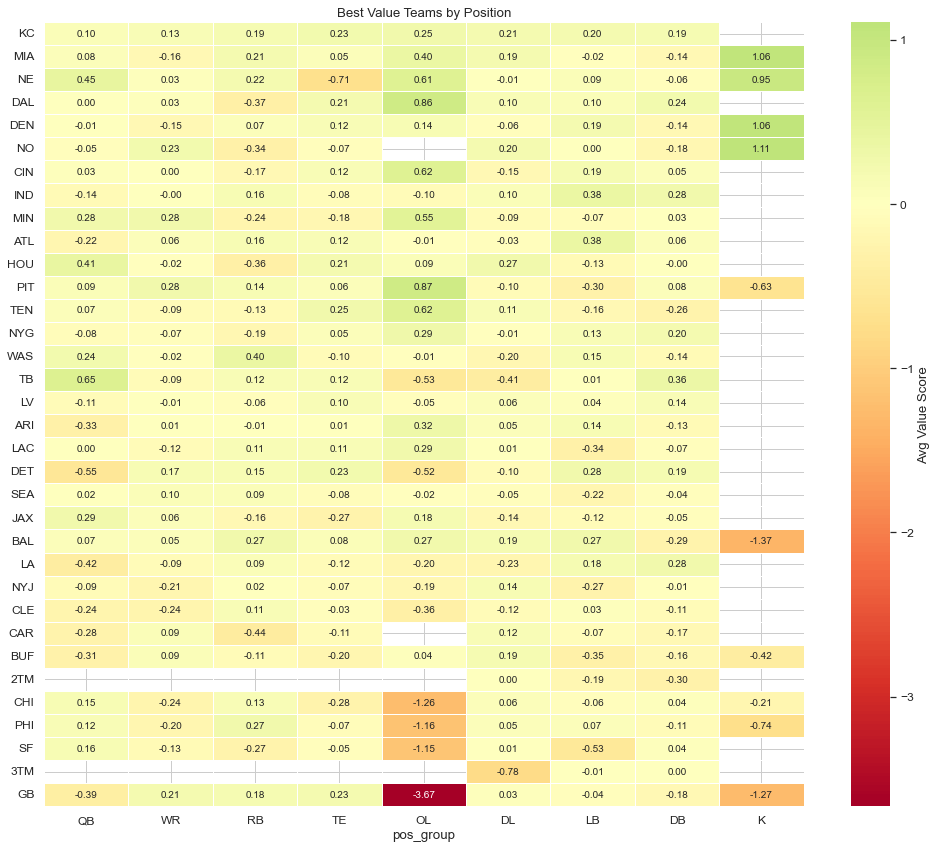

In [15]:
# Full history
fig = team_value_heatmap(scored)
fig

---
## 5f. Rookie vs. Veteran Value

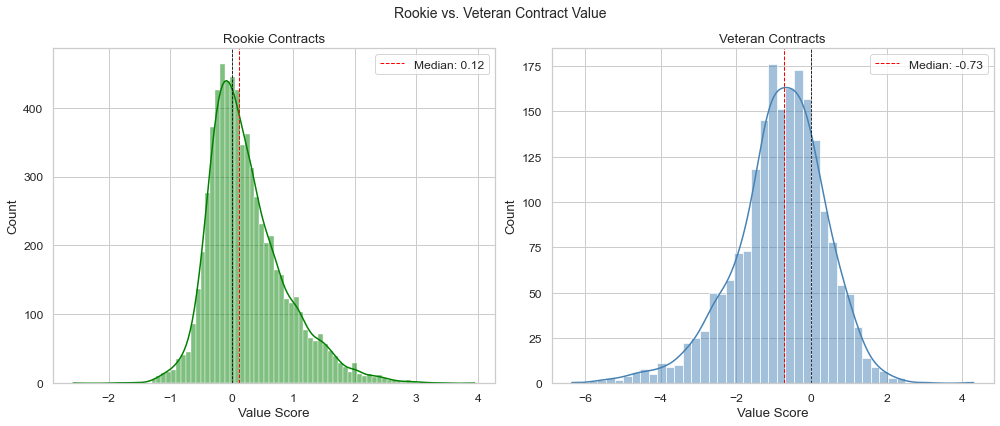

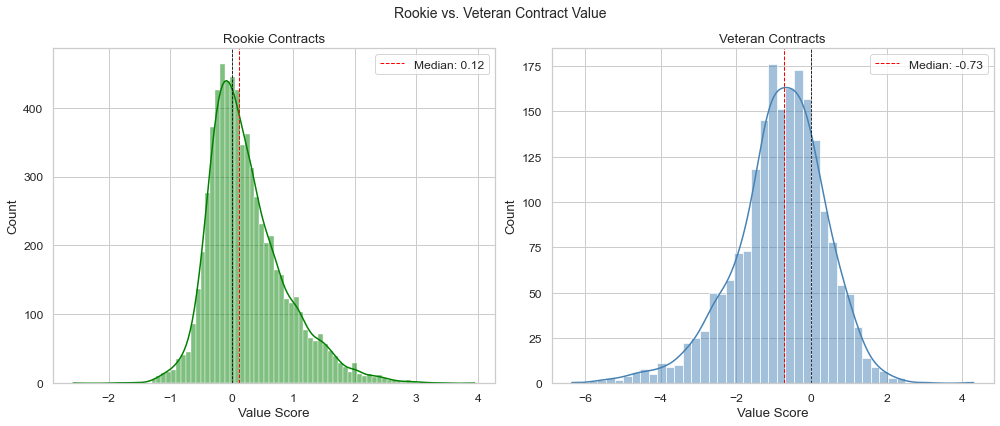

In [16]:
fig = rookie_vs_veteran_comparison(scored)
fig

---
## 5g. Player Deep Dives

Interactive trajectory plots for specific players.

In [17]:
# Patrick Mahomes
fig = player_trajectory(scored, 'Mahomes')
if fig: fig.show()

In [18]:
# Josh Allen
fig = player_trajectory(scored, 'Josh Allen')
if fig: fig.show()

In [19]:
# Derrick Henry
fig = player_trajectory(scored, 'Derrick Henry')
if fig: fig.show()

In [20]:
# Aaron Donald
fig = player_trajectory(scored, 'Aaron Donald')
if fig: fig.show()

In [21]:
# Justin Jefferson
fig = player_trajectory(scored, 'Jefferson')
if fig: fig.show()

---
## Custom Player Lookup

Change the player name below to explore any player.

In [22]:
PLAYER_NAME = 'Lamar Jackson'  # <-- Change this

fig = player_trajectory(scored, PLAYER_NAME)
if fig: fig.show()

# Show detailed stats
player_data = scored[scored['player_name'].str.contains(PLAYER_NAME, case=False, na=False)]
if len(player_data) > 0:
    cols = ['season', 'player_name', 'pos_group', 'recent_team',
            'apy_cap_pct', 'performance_zscore', 'salary_zscore',
            'value_score', 'value_percentile']
    cols = [c for c in cols if c in player_data.columns]
    display(player_data[cols].sort_values('season'))

season    player_name pos_group recent_team  apy_cap_pct  \
354     2018  Lamar Jackson        QB         BAL        0.013   
355     2019  Lamar Jackson        QB         BAL        0.013   
356     2020  Lamar Jackson        QB         BAL        0.013   
1163    2020  Lamar Jackson        DB         NYJ        0.001   
357     2021  Lamar Jackson        QB         BAL        0.013   
1857    2022  Lamar Jackson        DB         2TM        0.004   
358     2023  Lamar Jackson        QB         BAL        0.144   
359     2024  Lamar Jackson        QB         BAL        0.231   

      performance_zscore  salary_zscore  value_score  value_percentile  
354            -0.118734      -0.789203     0.670469         77.777778  
355             1.482478      -0.789203     2.271681        100.000000  
356             0.900254      -0.789203     1.689457         97.575758  
1163           -0.428535      -0.666978     0.238443         64.313082  
357             0.280714      -0.789203     1.069917         90.707071  
1857           -1.003134      -0.503259    -0.499876         19.704433  
358             1.164035       0.999077     0.164958         57.171717  
359             1.928940       2.186713    -0.257772         37.171717